In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic') 
mpl.rcParams['axes.unicode_minus'] = False
hn22 = pd.read_excel('../data/hn22_all.xlsx')

In [ ]:
hn22['']

Index(['mod_d', 'ID', 'ID_fam', 'year', 'region', 'town_t', 'apt_t', 'psu',
       'sex', 'age',
       ...
       'N_RETIN', 'N_B1', 'N_B2', 'N_NIAC', 'N_FOLATE', 'N_VITC', 'LF_secur_y',
       'LF_BUYER', 'LF_SAFE', 'N_DUSUAL'],
      dtype='object', length=623)

In [2]:
# 추출할 칼럼들 정리
ext_columns = ['sex','age',
            'mh_PHQ_S', 'mh_GAD_S','mh_stress',
            'BP16_1', 
            'L_BR_FQ', 'L_LN_FQ', 'L_DN_FQ',
            'BD1_11', 'N_WAT_C','LS_FRUIT', 'LS_VEG1','LS_1YR', 
            'BE8_1','BE9','BE5_1',]

# 추출
hn22_ext = hn22[ext_columns]

In [3]:
# 이름 번경할 칼럼들 정리
rename_dict = {
    'mh_PHQ_S' : 'PHQ_점수',
    'mh_GAD_S' : 'GAD_점수',
    'mh_stress' : '스트레스_인지',

    'BP16_1' : '주중 수면 시간',
    'L_BR_FQ': '아침식사빈도',
    'L_LN_FQ': '점심식사빈도',
    'L_DN_FQ': '저녁식사빈도',

    'N_WAT_C' : '물섭취량_하루',
    'LS_FRUIT' : '과일섭취빈도_1년',
    'LS_VEG1' : '채소섭취빈도_1년',
    'LS_1YR' : '식이보충제복용여부_1년', 
    
    'BD1_11' : '음주빈도_1년',

    'BE8_1' : '평소앉는시간_시간',
    'BE9' : '60분이상신체활동일수',
    'BE5_1': '1주일근력운동일수',
}

# 칼럼들 이름 번경 
hn22_rename = hn22_ext.rename(columns=rename_dict)
hn22_rename.head(10)

,sex,age,PHQ_점수,GAD_점수,스트레스_인지,주중 수면 시간,아침식사빈도,점심식사빈도,저녁식사빈도,음주빈도_1년,물섭취량_하루,과일섭취빈도_1년,채소섭취빈도_1년,식이보충제복용여부_1년,평소앉는시간_시간,60분이상신체활동일수,1주일근력운동일수
0,2,56,7.0,6.0,1.0,8.0,3.0,1.0,1.0,1.0,3.5,2.0,2.0,1.0,11.0,88.0,1.0
1,1,30,6.0,7.0,0.0,7.0,1.0,1.0,1.0,3.0,14.9,3.0,2.0,1.0,12.0,88.0,6.0
2,2,25,11.0,11.0,1.0,6.0,4.0,1.0,2.0,4.0,10.0,2.0,2.0,1.0,6.0,88.0,6.0
3,1,66,0.0,0.0,0.0,9.0,1.0,1.0,1.0,3.0,5.0,2.0,1.0,1.0,11.0,88.0,1.0
4,2,62,0.0,0.0,0.0,7.0,1.0,1.0,1.0,2.0,5.0,2.0,1.0,1.0,5.0,88.0,4.0
5,1,64,NaN,0.0,0.0,99.0,1.0,1.0,1.0,3.0,5.0,6.0,1.0,2.0,99.0,88.0,9.0
6,2,61,0.0,0.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,5.0,88.0,1.0
7,2,22,3.0,3.0,1.0,5.0,3.0,1.0,1.0,1.0,2.5,6.0,2.0,2.0,9.0,88.0,1.0
8,2,53,0.0,3.0,0.0,6.0,1.0,1.0,1.0,8.0,6.0,1.0,1.0,1.0,6.0,88.0,5.0
9,2,24,8.0,13.0,1.0,7.0,2.0,1.0,1.0,2.0,5.0,5.0,3.0,2.0,12.0,88.0,5.0


In [4]:
# phq 점수가 15 이상이거나 gad 점수가 15 이상이면 '위험'
# phq 점수가 10 이상 14 이하이거나 gad 점수가 10 이상 14 이하면 '중증'
# 그 외 '정상'
def mental_group(hn):
    if (hn['PHQ_점수'] >= 15 or hn['GAD_점수'] >= 15) :
        return '위험'
    elif 10 <= hn['PHQ_점수'] <= 14 or 10 <= hn['GAD_점수'] <= 14 :
        return '중증'
    else:
        return '정상'
    
hn22_rename['위험군_분류'] = hn22_rename.apply(mental_group, axis = 1) 

In [5]:
# rename 후 그룹별 개수 체크
print(pd.value_counts(hn22_rename['위험군_분류']))

위험군_분류
정상    5871
중증     265
위험     129
Name: count, dtype: int64


/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_13706/1718071899.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(hn22_rename['위험군_분류']))


<Axes: xlabel='위험군_분류', ylabel='PHQ_점수'>

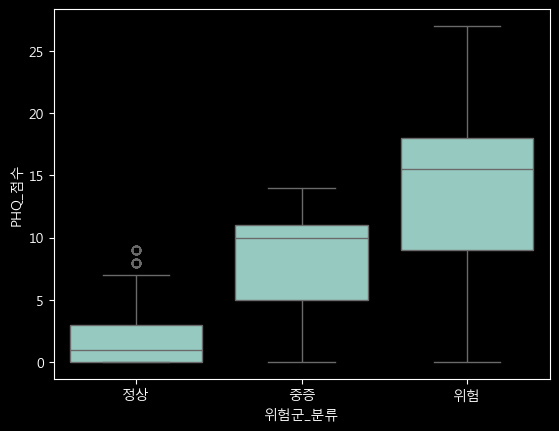

In [6]:
# 각 그룹별 PHQ 점수 분포도(PHQ 점수 이상치 제거 전)
sns.boxplot(data = hn22_rename, y = 'PHQ_점수', x = '위험군_분류')

In [7]:
# 그룹별 이상치 제거하기

# 새로운 데이터프레임 생성(concat 받을 데이터)
hn22_o = pd.DataFrame()

# 정상, 중증, 위험 별로 각 그룹 추출 후 이상치 제거한 다음 concat으로 합침
for denger in ['정상', '중증', '위험'] :
    hn22_t = hn22_rename[hn22_rename['위험군_분류'] == denger]
    Q1 = hn22_t['PHQ_점수'].quantile(0.25)
    Q3 = hn22_t['PHQ_점수'].quantile(0.75)
    IQR = Q3 - Q1
    hn22_t  = hn22_t[(hn22_t['PHQ_점수'] >= Q1 - 1.5 * IQR) & (hn22_t['PHQ_점수'] <= Q3 + 1.5 * IQR)]
    hn22_o = pd.concat([hn22_o, hn22_t], axis= 0)
hn22_o = hn22_o.reset_index(drop=True)
hn22_o


,sex,age,PHQ_점수,GAD_점수,스트레스_인지,주중 수면 시간,아침식사빈도,점심식사빈도,저녁식사빈도,음주빈도_1년,물섭취량_하루,과일섭취빈도_1년,채소섭취빈도_1년,식이보충제복용여부_1년,평소앉는시간_시간,60분이상신체활동일수,1주일근력운동일수,위험군_분류
0,2,56,7.0,6.0,1.0,8.0,3.0,1.0,1.0,1.0,3.5,2.0,2.0,1.0,11.0,88.0,1.0,정상
1,1,30,6.0,7.0,0.0,7.0,1.0,1.0,1.0,3.0,14.9,3.0,2.0,1.0,12.0,88.0,6.0,정상
2,1,66,0.0,0.0,0.0,9.0,1.0,1.0,1.0,3.0,5.0,2.0,1.0,1.0,11.0,88.0,1.0,정상
3,2,62,0.0,0.0,0.0,7.0,1.0,1.0,1.0,2.0,5.0,2.0,1.0,1.0,5.0,88.0,4.0,정상
4,2,61,0.0,0.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,5.0,88.0,1.0,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,1,33,5.0,16.0,1.0,6.0,4.0,1.0,2.0,4.0,5.0,7.0,5.0,2.0,6.0,88.0,1.0,위험
4722,1,53,15.0,9.0,1.0,7.0,2.0,1.0,1.0,5.0,7.5,7.0,1.0,2.0,10.0,88.0,3.0,위험
4723,2,55,9.0,21.0,1.0,8.0,1.0,1.0,1.0,1.0,7.5,2.0,1.0,1.0,10.0,88.0,1.0,위험
4724,2,67,15.0,0.0,1.0,9.0,1.0,1.0,1.0,8.0,5.0,2.0,1.0,1.0,8.0,88.0,1.0,위험


<Axes: xlabel='위험군_분류', ylabel='PHQ_점수'>

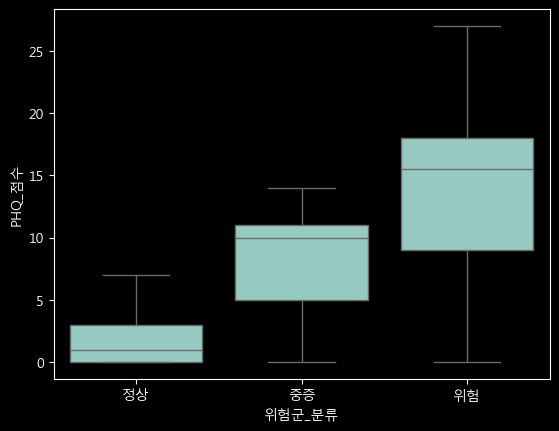

In [8]:
# 각 그룹별 PHQ 점수 분포도(PHQ 점수 이상치 제거 후)
sns.boxplot(data = hn22_o, y = 'PHQ_점수', x = '위험군_분류')

<Axes: xlabel='위험군_분류', ylabel='GAD_점수'>

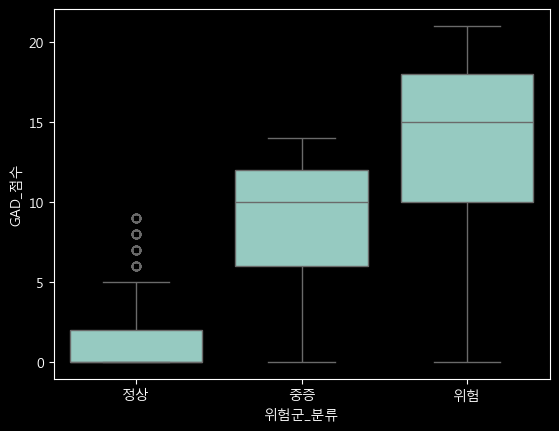

In [9]:
# 각 그룹별 gad 점수 분포도(GAD 점수 이상치 제거 전)
sns.boxplot(data = hn22_rename, y = 'GAD_점수', x = '위험군_분류')

In [10]:
# 그룹별 이상치 제거하기

# 새로운 데이터프레임 생성(concat 받을 데이터)
hn22_con = pd.DataFrame()

# 정상, 중증, 위험 별로 각각 그룹 추출 후 이상치 제거한 다음 concat으로 합침
for denger in ['정상', '중증', '위험'] :
    hn22_t = hn22_o[hn22_o['위험군_분류'] == denger]
    Q1 = hn22_t['GAD_점수'].quantile(0.25)
    Q3 = hn22_t['GAD_점수'].quantile(0.75)
    IQR = Q3 - Q1
    hn22_t  = hn22_t[(hn22_t['GAD_점수'] >= Q1 - 1.5 * IQR) & (hn22_t['GAD_점수'] <= Q3 + 1.5 * IQR)]
    hn22_con = pd.concat([hn22_con, hn22_t], axis= 0)
hn22_con = hn22_con.reset_index(drop=True)
hn22_con


,sex,age,PHQ_점수,GAD_점수,스트레스_인지,주중 수면 시간,아침식사빈도,점심식사빈도,저녁식사빈도,음주빈도_1년,물섭취량_하루,과일섭취빈도_1년,채소섭취빈도_1년,식이보충제복용여부_1년,평소앉는시간_시간,60분이상신체활동일수,1주일근력운동일수,위험군_분류
0,1,66,0.0,0.0,0.0,9.0,1.0,1.0,1.0,3.0,5.0,2.0,1.0,1.0,11.0,88.0,1.0,정상
1,2,62,0.0,0.0,0.0,7.0,1.0,1.0,1.0,2.0,5.0,2.0,1.0,1.0,5.0,88.0,4.0,정상
2,2,61,0.0,0.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,5.0,88.0,1.0,정상
3,2,22,3.0,3.0,1.0,5.0,3.0,1.0,1.0,1.0,2.5,6.0,2.0,2.0,9.0,88.0,1.0,정상
4,2,53,0.0,3.0,0.0,6.0,1.0,1.0,1.0,8.0,6.0,1.0,1.0,1.0,6.0,88.0,5.0,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,1,33,5.0,16.0,1.0,6.0,4.0,1.0,2.0,4.0,5.0,7.0,5.0,2.0,6.0,88.0,1.0,위험
4408,1,53,15.0,9.0,1.0,7.0,2.0,1.0,1.0,5.0,7.5,7.0,1.0,2.0,10.0,88.0,3.0,위험
4409,2,55,9.0,21.0,1.0,8.0,1.0,1.0,1.0,1.0,7.5,2.0,1.0,1.0,10.0,88.0,1.0,위험
4410,2,67,15.0,0.0,1.0,9.0,1.0,1.0,1.0,8.0,5.0,2.0,1.0,1.0,8.0,88.0,1.0,위험


<Axes: xlabel='위험군_분류', ylabel='GAD_점수'>

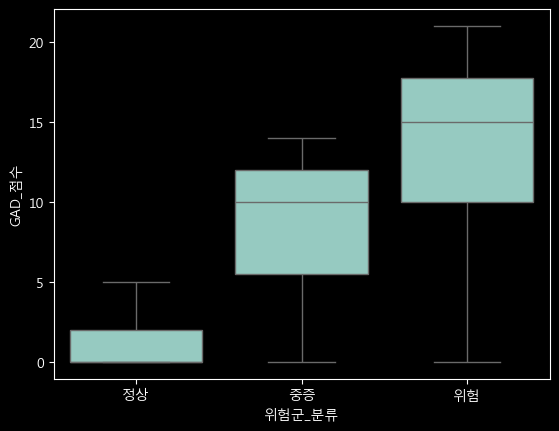

In [11]:
# 각 그룹별 gad 점수 분포도(GAD 점수 이상치 제거 후)
sns.boxplot(data = hn22_con, y = 'GAD_점수', x = '위험군_분류')

In [12]:
# 이상치 제거 후 그룹별 개수 체크
pd.value_counts(hn22_con['위험군_분류'])

/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_13706/1488921691.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(hn22_con['위험군_분류'])


위험군_분류
정상    4043
중증     247
위험     122
Name: count, dtype: int64

In [13]:
# 결측값 제거 
hn22_cleaned = hn22_con.dropna(subset = ['PHQ_점수', 'GAD_점수'])

In [14]:
# 전처리된 과정에서 자연스럽게 19세 미만 데이터가 제거됨.
len(hn22_cleaned[hn22_cleaned['age'] < 19])

0

In [15]:
# 결측값 제거 후 그룹별 개수 체크
pd.value_counts(hn22_cleaned['위험군_분류'])

/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_13706/3408929023.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(hn22_cleaned['위험군_분류'])


위험군_분류
정상    4043
중증     247
위험     122
Name: count, dtype: int64

In [16]:
# csv 파일로 변환
hn22_cleaned.to_csv('data_mental.csv')